In [47]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

# import packages 
import re
import shutil
import os

# Import transcript length

In [48]:
# Import all transcript with a read coverage of at least 10 reads
transcriptome_10reads = pd.read_csv('number_of_genes_with_total_of_10_reads.csv')


In [56]:
len(transcriptome_10reads['x'].unique())

125828

In [57]:
transcriptome_10reads

,x
0,MSTRG.1.1
1,MSTRG.1.2
2,MSTRG.2.1
3,ccar_ua01-g3.t2
4,ccar_ua01-g3.t2.1.6676fed8
...,...
125823,scaffold_72-g45758.t1
125824,scaffold_72-g45759.t1
125825,scaffold_72-g45760.t1
125826,scaffold_129-g45565.t1


In [58]:
# how many lines start with MSTRG 
transcriptome_10reads['x'].str.startswith('MSTRG').sum()

48982

In [50]:
# Import the transcriptome to have the length of ALL transcripts 
annotation_length = pd.read_csv('../A_annotation/carcar_annotation_v5_transcript_lengths.tsv', sep='\t')

In [51]:
# Import the transcriptome to have the length of ALL transcripts 
stringtie_length = pd.read_csv('../B_transcriptome/transcriptome_transcript_lengths.tsv', sep='\t')
# add M to each transcript_id in the stringtie_length df
stringtie_length['Transcript_ID'] = 'M' + stringtie_length['Transcript_ID'].astype(str)


# Ensure there are no leading or trailing spaces in the 'x' column of transcriptome_10reads
transcriptome_10reads['x'] = transcriptome_10reads['x'].str.strip()

In [52]:
# create one df out of annotation_length and stringtie_length (append the rows from one to the other)
lengths = pd.concat([annotation_length, stringtie_length], ignore_index=True)

# Ensure there are no leading or trailing spaces in the 'Transcript_ID' column
lengths['Transcript_ID'] = lengths['Transcript_ID'].str.strip()

In [53]:


# Filter to only keep the transcriptome_length rows that have a read coverage of at least 10 reads
transcriptome_length = lengths.loc[lengths['Transcript_ID'].isin(transcriptome_10reads['x'])]

In [54]:
transcriptome_length

,Transcript_ID,Length
0,scaffold_1-g45517.t1,948
6,scaffold_1-g45522.t1,729
11,scaffold_1-g45527.t1,1689
15,scaffold_1-g45531.t1,1665
16,scaffold_1-g45531.t2,2109
...,...,...
145225,MSTRG.34442.1,1180
145226,MSTRG.34442.2,1168
145227,MSTRG.34442.3,948
145228,MSTRG.34443.1,1652


In [59]:
transcriptome_length['Transcript_ID'].str.startswith('MSTRG').sum()

20607

In [24]:

# Import the transcriptome to have the length of ALL transcripts 
#transcriptome_length = pd.read_csv('../B_transcriptome/transcriptome_transcript_lengths.tsv', sep='\t')

# Specify the directory containing the .csv files
directory = '../9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/'

# Create an empty list to hold the dataframes
dataframes = []

# Iterate over all files in the specified directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # Check if the file is a .csv file and is named up.csv or down.csn
    if filename.endswith('up.csv') or filename.endswith('down.csv'):
        df = pd.read_csv(filepath)
        dataframes.append(df)

# Merge all dataframes into a single dataframe
lncrna = pd.concat(dataframes, ignore_index=True)

# filter for differentially expressed lncRNAs
DElncrna = lncrna.loc[lncrna['color'] == 'Differentially Expressed LncRNA'] 

In [25]:
lncrna

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,regulation,condition,-log10p,color
0,ccar_ua01-g3.t2,151.067385,0.721066,0.106773,3.208259,1.335414e-03,0.015318,up,Anoxia to Reoxygenation,1.814798,Differentially Expressed
1,ccar_ua01-g3.t2.1.6676fed8,153.718377,0.739381,0.106302,3.394766,6.868724e-04,0.008417,up,Anoxia to Reoxygenation,2.074855,Differentially Expressed
2,ccar_ua01-g3.t2.2.6676fed8,151.067385,0.721066,0.106773,3.208259,1.335414e-03,0.015318,up,Anoxia to Reoxygenation,1.814798,Differentially Expressed
3,ccar_ua01-g3.t1,151.499556,0.726602,0.106646,3.263982,1.098582e-03,0.012874,up,Anoxia to Reoxygenation,1.890284,Differentially Expressed
4,strg.15.1,67.572957,1.022762,0.163276,3.945773,7.954281e-05,0.001194,up,Anoxia to Reoxygenation,2.923017,Differentially Expressed
...,...,...,...,...,...,...,...,...,...,...,...
77927,ccar_ub25-g45355.t1,46.643097,-1.399221,0.210568,-4.847412,1.250823e-06,0.000007,up,Normoxia to Anoxia,5.143075,Differentially Expressed
77928,ccar_ub25-g45355.t1.1.6676f568,46.963920,-1.389688,0.211793,-4.774368,1.802729e-06,0.000010,up,Normoxia to Anoxia,4.990488,Differentially Expressed
77929,scaffold_45-g45721.t1,18.984951,-2.393121,0.411633,-4.894189,9.871191e-07,0.000006,up,Normoxia to Anoxia,5.241399,Differentially Expressed
77930,scaffold_45-g45721.t1.1.6676cfa2,18.984951,-2.393121,0.411633,-4.894189,9.871191e-07,0.000006,up,Normoxia to Anoxia,5.241399,Differentially Expressed


In [26]:
len(lncrna['transcript_id'])

77932

In [27]:
# check length of lncRNA and DElncRNA dataframe 
print('Length of lncRNA dataframe:', len(lncrna['transcript_id'].drop_duplicates()))
print('Length of DElncRNA dataframe:', len(DElncrna['transcript_id'].drop_duplicates()))

Length of lncRNA dataframe: 47952
Length of DElncRNA dataframe: 2208


In [28]:
# extract the length information for the lncRNAs from the transcript file
lncrna_length = transcriptome_length[transcriptome_length['Transcript_ID'].str.lower().isin(lncrna['transcript_id'])]
DElncrna_length = transcriptome_length[transcriptome_length['Transcript_ID'].str.lower().isin(DElncrna['transcript_id'])]

In [29]:
lncrna_length

,Transcript_ID,Length
26,scaffold_1-g45540.t1,1971
27,scaffold_1-g45540.t2,1968
31,scaffold_1-g45543.t1,1023
46,ccar_ub01-g23276.t1,2324
50,ccar_ub01-g23280.t1,1167
...,...,...
82537,scaffold_59-g45738.t2,2478
82538,scaffold_59-g45738.t1,2466
82539,scaffold_59-g45738.t3,2430
82540,scaffold_59-g45739.t1_scaffold_59-g45740.t1,2345


In [30]:
# calculate max/min/ average length of gene length
transcriptome_max = transcriptome_length['Length'].max()
transcriptome_min = transcriptome_length['Length'].min()
transcriptome_mean = transcriptome_length['Length'].mean()


# calculate max length of gene length
lncrna_max = lncrna_length['Length'].max()
lncrna_min = lncrna_length['Length'].min()
lncrna_median = lncrna_length['Length'].median()

DElncrna_max = DElncrna_length['Length'].max()
DElncrna_min = DElncrna_length['Length'].min()
DElncrna_median = DElncrna_length['Length'].median()

# 4 Histplot gene length distribution

/tmp/ipykernel_1511/2842680557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lncrna_length['Length_kb'] = np.array(lncrna_length['Length']) / 1000


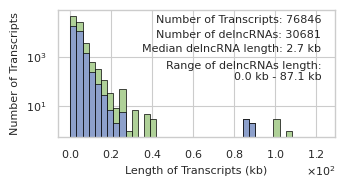

In [31]:
# PLOT: Length Distribution of Genes 
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8, "axes.formatter.use_mathtext": True})
plt.figure(figsize=(((9)/2.54), (5/2.54)))


# Convert lengths to kilobases
transcriptome_length['Length_kb'] = np.array(transcriptome_length['Length']) / 1000
lncrna_length['Length_kb'] = np.array(lncrna_length['Length']) / 1000

# on the x axis: Length of genes (in kb)
plt.xlabel('Length of Transcripts (kb)')
# on the y axis: Number of genes
plt.ylabel('Number of Transcripts')

# plot the histogram
plt.hist(transcriptome_length['Length_kb'], bins=range(0, int(max(transcriptome_length['Length_kb']) + 20), 3),
          color='#AFD198', edgecolor='black', linewidth=0.5)
plt.hist(lncrna_length['Length_kb'], bins=range(int(min(lncrna_length['Length_kb'])), int(max(lncrna_length['Length_kb']) + 20), 3), 
         color='#8DA0CB', edgecolor='black', linewidth=0.5)
plt.yscale('log')
xfmt = plt.ScalarFormatter()
xfmt.set_powerlimits((0, 0))
plt.gca().xaxis.set_major_formatter(xfmt)

# LABELS: 
# add label for total number of genes 
plt.text(0.95, 0.96, f'Number of Transcripts: {len(transcriptome_length["Transcript_ID"])}',
          ha='right', va='top', transform=plt.gca().transAxes, fontsize=8)
# add total number of unique genes 
plt.text(0.95, 0.84, f"Number of delncRNAs: {len((lncrna_length['Transcript_ID']))}", 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=8)
# add numeric label for average at the top right corner 
plt.text(0.95, 0.73, f'Median delncRNA length: {lncrna_median / 1000:.1f} kb', ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=8)
plt.text(0.95, 0.60, f'Range of delncRNAs length:\n{lncrna_min /1000:.1f} kb - {lncrna_max / 1000:.1f} kb',
          ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=8)

plt.tight_layout()

# save the plot as svg with 500 dpi
plt.savefig('lncrna_length_distribution.svg')